# Neural Network

A neural network is a computational model inspired by the structure and functioning of the human brain. It consists of interconnected nodes, also known as neurons or units, organized into layers. These layers include an input layer, one or more hidden layers, and an output layer. Each connection between neurons has a weight, and the network learns to adjust these weights during training to make accurate predictions or classifications based on input data. Neural networks are used in machine learning and artificial intelligence tasks, such as image recognition, natural language processing, and pattern recognition. They are capable of learning complex relationships and representations from data, making them powerful tools for various applications.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

The training data is the set of 4 letters $(r,i,c,e)$ defined on the plot below. For example,
the letter r can be defineed as 

$$
r = [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0].
$$

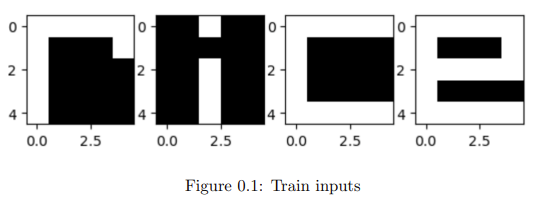

The truth (target) data is given as 

$$
[0, 0], [0, 1], [1, 0], [1, 1].
$$

Write a function neural(train, target, gamma, maxiter) that performs maxiter iterations of the gradient descent. Let the user set the learning rate parameter (γ). Your code will compute the loss function, the partial derivatives of the loss function with respect to V and W. The matrices V, W should be initialized with the same random seed.

Test the code with maxiter = 2000 and γ = 0.1. Print the loss function at the end of all the gradient descent iterations.
Check the code is correct by writing a small code that produces a prediction from an input that belongs to the training dataset (this can be defined as a function so that we can reuse it). We should recover exact prediction if the training has been done correctly.

Finally, choose the letter r and perform 100 perturbations of letter r, using the function change which will flip one digit in the data. For a given perturbation, apply the neural network to obtain a prediction. Count each time the prediction is good. Display the final number of good predictions (should be equal to 100: perfect score).

In [6]:
# Define activation function (sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Modify a letter code by flipping one random bit
def modify(L):
    n = np.random.randint(25)
    L[n] = 1 - L[n]
    return L

# Initialize weights matrices V and W with random values
np.random.seed(0)
Vmat = np.random.standard_normal(size=(25, 25))
Wmat = np.random.standard_normal(size=(2, 25))

# Training function
def neural_train(xinputs, targets, gamma, maxiter):
    n = 25
    k = 25
    m = 2
    loss_history = []

    # Initialize Vmat and Wmat here
    Vmat = np.random.standard_normal(size=(25, 25))
    Wmat = np.random.standard_normal(size=(2, 25))

    for iteration in range(maxiter):
        total_loss = 0
        for i in range(len(xinputs)):
            xinput = xinputs[i]
            target = targets[i]

            # Forward pass
            lvec = np.matmul(Vmat, xinput)
            qvec = sigmoid(lvec)
            zvec = np.matmul(Wmat, qvec)
            youtput = sigmoid(zvec)

            # Compute loss
            loss = 0.5 * np.sum((youtput - target) ** 2)
            total_loss += loss

            # Backpropagation
            delta_output = (youtput - target) * sigmoid_derivative(youtput)
            delta_hidden = np.matmul(Wmat.T, delta_output) * sigmoid_derivative(qvec)

            # Update W
            gradW = np.outer(delta_output, qvec)
            Wmat -= gamma * gradW

            # Update V
            gradV = np.outer(delta_hidden, xinput)
            Vmat -= gamma * gradV

        loss_history.append(total_loss)

    return Wmat, Vmat, loss_history

# Training data
xinput1 = np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0])
xinput2 = np.array([0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0])
xinput3 = np.array([1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0])
xinput4 = np.array([1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1])

# Target values
T1 = np.array([0, 0])
T2 = np.array([0, 1])
T3 = np.array([1, 0])
T4 = np.array([1, 1])

# Training parameters
gamma = 0.1
maxiter = 2000

# Train the neural network
Wmat, Vmat, loss_history = neural_train([xinput1, xinput2, xinput3, xinput4], [T1, T2, T3, T4], gamma, maxiter)

# Print the final loss
print("Final loss at the end of all the gradient descent iterations:", loss_history[-1])

# Function to predict using the trained neural network
def predict(input_data):
    lvec = np.matmul(Vmat, input_data)
    qvec = sigmoid(lvec)
    zvec = np.matmul(Wmat, qvec)
    youtput = sigmoid(zvec)
    return youtput

# Test the prediction with training data
for i, xinput in enumerate([xinput1, xinput2, xinput3, xinput4]):
    prediction = predict(xinput)
    print(f"Prediction for xinput{i+1}: {prediction}")

# Perturbation test
correct_predictions = 0
for _ in range(100):
    perturbed_xinput = modify(xinput1.copy())  # Create a perturbation of xinput1
    prediction = predict(perturbed_xinput)
    if np.all(np.round(prediction) == T1):  # Check if the prediction is correct (close to T1)
        correct_predictions += 1

print("Number of correct predictions on perturbed data:", correct_predictions)

Final loss at the end of all the gradient descent iterations: 0.003226236961058614
Prediction for xinput1: [0.03406579 0.02728046]
Prediction for xinput2: [0.0224931  0.97961902]
Prediction for xinput3: [0.97941291 0.02962622]
Prediction for xinput4: [0.96649006 0.96544791]
Number of correct predictions on perturbed data: 100
